# 1.Eligible for loan?

## import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

# fetch training and testing data

In [3]:
train=pd.read_csv("C://Users//Psmulay//Desktop//data science//projects//loan_prediction//training_set.csv")
test=pd.read_csv("C://Users//Psmulay//Desktop//data science//projects//loan_prediction//testing_set.csv")

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train.isna().sum()                    #checks sum of null values in dataset 

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# missing data treatment

In [9]:
for i in train.columns:
    if train[i].dtypes=='object':
        x=train[i].mode()[0]
        train[i]=train[i].fillna(x)
    else:
        x=train[i].mean()
        train[i]=train[i].fillna(x)

In [10]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# define X n Y

In [11]:
X=train.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Y=train[["Loan_Status"]]

# preprocessing

In [12]:
con=[]
cat=[]
for i in X.columns:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)               #separating data ACCORDING TO ITS DATA TYPE

In [13]:
X1=X[con]
X2=pd.get_dummies(X[cat])                  #performing one hot encoding on categorical data for model training
Xnew=X1.join(X2)                        

# splitting data into training and testing purpose

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# model

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=31)
model=dtc.fit(xtrain,ytrain)                 #model trains with the help of training data set


tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)



In [16]:
print(tr_acc,ts_acc)

1.0 0.7235772357723578


### Using random forest to increase accuracy

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=31,n_estimators=21)
model=rfc.fit(xtrain,ytrain)

ts_pred=model.predict(xtest)
tr_pred=model.predict(xtrain)

tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print(tr_acc,ts_acc)

0.9959266802443992 0.7967479674796748


In [18]:
tr=[]
ts=[]
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(random_state=31,n_estimators=i)
    model=rfc.fit(xtrain,ytrain)

    ts_pred=model.predict(xtest)
    tr_pred=model.predict(xtrain)

    tr_acc=accuracy_score(ytrain,tr_pred)
    ts_acc=accuracy_score(ytest,ts_pred)
    
    tr.append(tr_acc)
    ts.append(ts_acc)


### visualise the accuracy for various n_estimators

([<matplotlib.axis.XTick at 0x2c0bf668b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

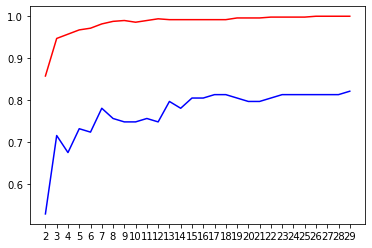

In [19]:

plt.plot(range(2,30),tr,c="red")
plt.plot(range(2,30),ts,c="blue")
plt.xticks(range(2,30))

### from graph we can see 29 estimators make model the most accurate giving highest accuracy

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=31,n_estimators=29)
model=rfc.fit(xtrain,ytrain)

ts_pred=model.predict(xtest)
tr_pred=model.predict(xtrain)

tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print(tr_acc,ts_acc)

1.0 0.8211382113821138


In [21]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
tg={"n_estimators":range(2,30,1)}
cv=GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 25}

In [22]:
cvmodel.score(Xnew,Y)

0.995114006514658

# model is trained and ready to test

In [23]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [24]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [25]:
for i in test.columns:
    if test[i].dtypes=='object':
        x=test[i].mode()[0]
        test[i]=test[i].fillna(x)
    else:
        x=test[i].mean()
        test[i]=test[i].fillna(x)

In [26]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# define x and y

In [27]:
Xtest=test.drop(labels=['Loan_ID'],axis=1)

In [28]:
Xtest

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


# preprocessing

In [29]:
con_test=[]
cat_test=[]
for i in Xtest.columns:
    if Xtest[i].dtypes=='object':
        cat_test.append(i)
    else:
        con_test.append(i) 

In [30]:
Xtest_1=Xtest[con_test]
Xtest_2=pd.get_dummies(Xtest[cat_test])
Xnew_test=Xtest_1.join(Xtest_2)

In [31]:
Xnew_test.shape

(367, 20)

In [32]:
Xnew_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [33]:
final_prediction=cvmodel.predict(Xnew_test)

In [34]:
submission_=test[["Loan_ID"]]

In [35]:
submission_["loan status"]=final_prediction

In [36]:
submission_

,Loan_ID,loan status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [37]:
submission_.to_csv("C://Users//Psmulay//Desktop//data science//prathamesh_mulay_loan_prediction.csv")

In [38]:
submission_['loan status'].value_counts()

Y    288
N     79
Name: loan status, dtype: int64

In [39]:
A=pd.read_csv("C://Users//Psmulay//Desktop//data science//projects//loan_prediction//submission.csv")

In [40]:
A['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

# 2.what should be loan amt if applicant is not eligible

In [41]:
train=train.sort_values(by="Loan_Status")


In [42]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [43]:
train_loan_status_Y=train.iloc[193:,:]
train_loan_status_N=train.iloc[:193,:]


In [44]:
train_loan_status_Y

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
435,LP002393,Female,Yes,0,Graduate,No,10047.0,0.000000,146.412162,240.0,1.000000,Semiurban,Y
422,LP002361,Male,Yes,0,Graduate,No,1820.0,1719.000000,100.000000,360.0,1.000000,Urban,Y
434,LP002390,Male,No,0,Graduate,No,3750.0,0.000000,100.000000,360.0,1.000000,Urban,Y
427,LP002368,Male,Yes,2,Graduate,No,5935.0,0.000000,133.000000,360.0,1.000000,Semiurban,Y
428,LP002369,Male,Yes,0,Graduate,No,2920.0,16.120001,87.000000,360.0,1.000000,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,LP001788,Female,No,0,Graduate,Yes,3463.0,0.000000,122.000000,360.0,0.842199,Urban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500.0,1260.000000,170.000000,360.0,1.000000,Rural,Y
234,LP001778,Male,Yes,1,Graduate,No,3155.0,1779.000000,140.000000,360.0,1.000000,Semiurban,Y
252,LP001841,Male,No,0,Not Graduate,Yes,2583.0,2167.000000,104.000000,360.0,1.000000,Rural,Y


In [45]:
train_loan_status_Y.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.154161,0.613562,-0.108081,-0.069094
CoapplicantIncome,-0.154161,1.000000,0.123103,0.030152,-0.056148
LoanAmount,0.613562,0.123103,1.000000,0.040196,-0.103317
Loan_Amount_Term,-0.108081,0.030152,0.040196,1.000000,0.069050
Credit_History,-0.069094,-0.056148,-0.103317,0.069050,1.000000


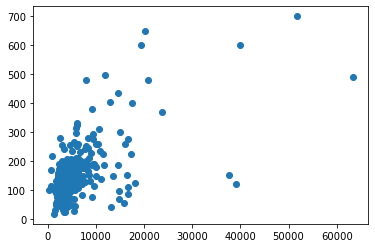

In [46]:
plt.scatter(train_loan_status_Y.ApplicantIncome,train_loan_status_Y.LoanAmount)

In [47]:
train_loan_status_Y.shape

(421, 13)

In [48]:
train_loan_status_Y.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# define X and Y

In [49]:
Y=train_loan_status_Y["LoanAmount"]
X=train_loan_status_Y.drop(labels=["LoanAmount","Loan_ID"],axis=1)

# preprocessing

In [50]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=="object":
        cat.append(i)
        
    else:
        con.append(i)

In [51]:
X1=X[con]
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

In [52]:
Xnew=Xnew.drop(labels=["Loan_Status_Y"],axis=1)

# train test splitting

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# model

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=31,n_estimators=20)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=31,n_estimators=21)
model=rfr.fit(xtrain,ytrain)

ts_pred=model.predict(xtest)
tr_pred=model.predict(xtrain)

from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
print(tr_err,ts_err)

14.536764762211188 47.456624271330156


In [56]:
tr=[]
ts=[]
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor(random_state=31,n_estimators=i)
    model=rfr.fit(xtrain,ytrain)

    ts_pred=model.predict(xtest)
    tr_pred=model.predict(xtrain)

    tr_err=mean_absolute_error(ytrain,tr_pred)
    ts_err=mean_absolute_error(ytest,ts_pred)
    
    tr.append(tr_err)
    ts.append(ts_err)

([<matplotlib.axis.XTick at 0x2c0bff6f910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

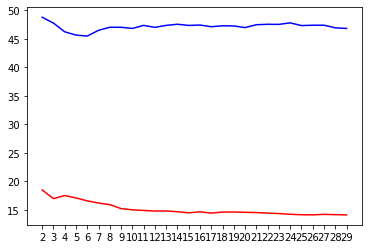

In [57]:

plt.plot(range(2,30),tr,c="red")
plt.plot(range(2,30),ts,c="blue")
plt.xticks(range(2,30))

In [58]:

from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=31)

tg = {"n_estimators":range(2,30,1),"max_depth":range(2,20)}
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 6, 'n_estimators': 19}

In [59]:
rfr=RandomForestRegressor(random_state=31,n_estimators=20,max_depth=6)
model=rfr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
print("TR: ",tr_err,"TS:",ts_err)

TR:  24.2557759161973 TS: 44.261388819678174


# pedicting loan amount

In [60]:
train_loan_status_N=train_loan_status_N.drop(labels=["LoanAmount","Loan_ID"],axis=1)

In [61]:
cat=[]
con=[]
for i in train_loan_status_N.columns:
    if train_loan_status_N[i].dtypes=="object":
        cat.append(i)
        
    else:
        con.append(i)

In [62]:
X1_N=train_loan_status_N[con]
X2_N=pd.get_dummies(train_loan_status_N[cat])
Xnew_N=X1_N.join(X2_N)

In [63]:
Xnew_N=Xnew_N.drop(labels=["Loan_Status_N","Loan_Status_Y"],axis=1)

In [64]:
Xnew_N.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [65]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [66]:
Prediction2=model.predict(Xnew_N)


In [67]:
Prediction2.shape

(193,)

In [68]:
Q=train.iloc[:193,:1]

In [69]:
Q["loan_amt_pred"]=Prediction2

In [70]:
Q

,Loan_ID,loan_amt_pred
613,LP002990,113.559192
489,LP002556,74.653952
186,LP001641,98.901713
487,LP002547,384.457498
486,LP002545,115.879622
...,...,...
574,LP002863,168.723110
13,LP001029,121.114448
76,LP001256,164.315696
576,LP002872,123.545045


# 3.Duration

In [71]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N
489,LP002556,Male,No,0,Graduate,No,2435.0,0.0,75.0,360.0,1.0,Urban,N
186,LP001641,Male,Yes,1,Graduate,Yes,2178.0,0.0,66.0,300.0,0.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333.0,0.0,500.0,360.0,1.0,Urban,N
486,LP002545,Male,No,2,Graduate,No,3547.0,0.0,80.0,360.0,0.0,Rural,N


In [111]:
test=pd.read_csv("C://Users//Psmulay//Desktop//data science//projects//loan_prediction//testing_set.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [87]:
C=train[["Loan_Amount_Term"]]


In [88]:
C=C/12

In [90]:
train["Loan_Amount_Term"]=C

In [73]:
train.shape

(614, 13)

In [74]:
train[(train['Loan_Amount_Term']<240)].shape

(56, 13)

In [75]:
train.corr()['Loan_Amount_Term']

ApplicantIncome     -0.045147
CoapplicantIncome   -0.059710
LoanAmount           0.038801
Loan_Amount_Term     1.000000
Credit_History       0.001395
Name: Loan_Amount_Term, dtype: float64

## Anovas

In [76]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 613 to 306
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 67.2+ KB


In [78]:
model_gender=ols("Loan_Amount_Term ~ Gender",train).fit()
anova_lm(model_gender)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,1.374777e+04,13747.772766,3.330271,0.068503
Residual,612.0,2.526412e+06,4128.124554,NaN,NaN


In [79]:
model_Married=ols("Loan_Amount_Term ~ Married",train).fit()
anova_lm(model_Married)

,df,sum_sq,mean_sq,F,PR(>F)
Married,1.0,2.584170e+04,25841.698851,6.290023,0.0124
Residual,612.0,2.514318e+06,4108.363237,NaN,NaN


In [80]:
model_Dependents=ols("Loan_Amount_Term ~ Dependents",train).fit()
anova_lm(model_Dependents)

,df,sum_sq,mean_sq,F,PR(>F)
Dependents,3.0,4.381496e+04,14604.985207,3.568834,0.013954
Residual,610.0,2.496345e+06,4092.368925,NaN,NaN


In [81]:
model_Education=ols("Loan_Amount_Term ~ Education",train).fit()
anova_lm(model_Education)

,df,sum_sq,mean_sq,F,PR(>F)
Education,1.0,1.515526e+04,15155.261194,3.673268,0.055757
Residual,612.0,2.525005e+06,4125.824737,NaN,NaN


In [82]:
model_Self_Employed=ols("Loan_Amount_Term ~ Self_Employed",train).fit()
anova_lm(model_Self_Employed)

,df,sum_sq,mean_sq,F,PR(>F)
Self_Employed,1.0,2.926662e+03,2926.662021,0.705933,0.401125
Residual,612.0,2.537233e+06,4145.806108,NaN,NaN


### pval less than 0.05 for self employed, dependants and married

In [91]:
B=train[(train.Loan_Amount_Term<=20)&(train.Loan_Status=='Y')]


In [93]:
B.shape
B.index=range(0,41)

In [94]:
Y3=B[["Loan_Amount_Term"]]
X3=B.drop(labels=["Loan_Amount_Term","Loan_ID"],axis=1)

In [97]:
X3.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
cat=[]
con=[]
for i in X3.columns:
    if X3[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
        

In [101]:
X4=X3[con]
X5=pd.get_dummies(X3[cat])
Xnew=X4.join(X5)

In [102]:
from sklearn.model_selection import train_test_split
xtrain3,xtest3,ytrain3,ytest3=train_test_split(Xnew,Y3,test_size=0.2,random_state=31)

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,n_estimators=20)

In [105]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=21)

tg = {"n_estimators":range(2,30,1),"max_depth":range(2,20)}
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(Xnew,Y3)
cvmodel.best_params_

{'max_depth': 2, 'n_estimators': 16}

In [150]:
for i in test.columns:
    if test[i].dtypes=='object':
        x=test[i].mode()[0]
        test[i]=test[i].fillna(x)
    else:
        x=test[i].mean()
        test[i]=test[i].fillna(x)

In [151]:
test.credit_History=test.Credit_History.fillna(test.Credit_History.mean())

d=test[["Loan_Amount_Term"]]

D=d/12
test["Loan_Amount_Term"]=D
E=test[(test.Loan_Amount_Term<=20)]
E.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,0.000121,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,0.000121,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,0.000121,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,0.000121,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,0.000121,1.000000,Urban


In [152]:
E.shape
#E.index=range(0,34)


(367, 12)

In [153]:
test3=E.drop(labels=["Loan_Amount_Term","Loan_ID"],axis=1)


In [154]:
cat=[]
con=[]
for i in test3.columns:
    if test3[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
        

In [155]:
X4=test3[con]
X5=pd.get_dummies(test3[cat])
Xnew3=X4.join(X5)

In [156]:
Xnew3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Credit_History           367 non-null    float64
 4   Gender_Female            367 non-null    uint8  
 5   Gender_Male              367 non-null    uint8  
 6   Married_No               367 non-null    uint8  
 7   Married_Yes              367 non-null    uint8  
 8   Dependents_0             367 non-null    uint8  
 9   Dependents_1             367 non-null    uint8  
 10  Dependents_2             367 non-null    uint8  
 11  Dependents_3+            367 non-null    uint8  
 12  Education_Graduate       367 non-null    uint8  
 13  Education_Not Graduate   367 non-null    uint8  
 14  Self_Employed_No         3

In [157]:
Prediction3=model.predict(Xnew3)

In [158]:
Prediction3=Prediction3/12
Prediction3.shape


(367,)

In [159]:

R=E[["Loan_ID"]]
R["Loan_Amount_Term"]=Prediction3
R

,Loan_ID,Loan_Amount_Term
0,LP001015,11.142412
1,LP001022,10.086708
2,LP001031,13.086059
3,LP001035,8.116295
4,LP001051,6.816869
...,...,...
362,LP002971,10.882866
363,LP002975,9.208424
364,LP002980,9.430374
365,LP002986,13.545986
